In [110]:
import numpy as np
import matplotlib.pyplot as plt

In [128]:
data = np.genfromtxt('Image1.txt', delimiter = ',')
np.random.shuffle(data)
x = data[:, (0,1)]
y = data[:, 2]
m = len(y)
n = np.unique(y)
k = len(np.unique(y))   #Number of clusters
c_r1 = np.random.uniform(low=np.min(x[:,0]), high=np.max(x[:,0]), size=(k,1))
c_r2 = np.random.uniform(low=np.min(x[:,1]), high=np.max(x[:,1]), size=(k,1))
centroid = np.hstack((c_r1,c_r2))
k

2

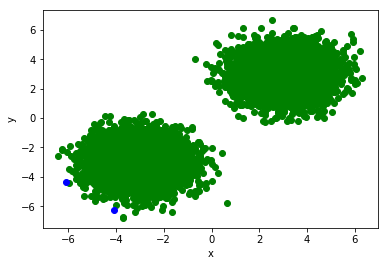

In [129]:
def graph_plotting(x, y, centroid):
    plt.figure()
    plt.scatter(x[:, 0], x[:, 1], c = 'green')
    plt.scatter(centroid[:, 0], centroid[:, 1], color = "blue")
    plt.xlabel('x')
    plt.ylabel('y')
graph_plotting(x, y, centroid)

In [130]:
def Cluster_assignment(x, k, centroid, m):
    cluster_num = np.zeros((m, 1))
    for i in range(m):
        dist = (np.sum((centroid - x[i])**2, axis = 1)).reshape(k,1)
        cluster_num[i] = np.argmin(dist)
    return cluster_num
Cluster_assignment(x, k, centroid, m)

array([[0.],
       [0.],
       [1.],
       ...,
       [0.],
       [1.],
       [0.]])

In [131]:
def centroid_update(x, k, centroid, m):
    centroid_index = Cluster_assignment(x, k,centroid, m)
    new_centroids = np.zeros((k, 2))
    for i in range(k):
        z = len((np.argwhere(centroid_index == i))[:,0])
        a = ((np.argwhere(centroid_index == i))[:,0]).reshape(z,1).flatten()
        new_centroids[i] = (x[a,:]).mean(0)   
    return new_centroids

In [132]:
def loop(x,k,centroid,m):
    old_centroid = centroid
    old_centroid
    for i in range(10):
        new_centroid = centroid_update(x, k, old_centroid,m)
        old_centroid = new_centroid
    return new_centroid
    

In [133]:
centroid = loop(x,k, centroid,m)

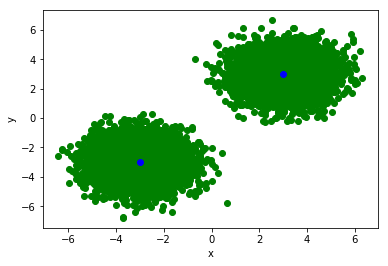

In [134]:
graph_plotting(x, y, centroid)